In [1]:
!pip install opencv-python
!pip install numpy
!pip install matplotlib


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\Lenovo\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\Lenovo\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\Lenovo\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
import cv2  # OpenCV for image processing
import numpy as np  # NumPy for numerical operations
import matplotlib.pyplot as plt  # Matplotlib for visualization

ModuleNotFoundError: No module named 'cv2'

In [ ]:
def cartoonify_image(image_path,median_ksize,laplacian_ksize,Threshold,bilateral_d,bilateral_sigmaColor,bilateral_sigmaSpace):

    img = cv2.imread(image_path) # Read the image
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY) # Convert to grayscale
    gray_blur = cv2.medianBlur(gray, median_ksize) # Apply median blur filter to reduce noise
    
    # Apply Laplacian filter for edge detection
    edges = cv2.Laplacian(gray_blur, cv2.CV_8U, laplacian_ksize)
    edges = cv2.threshold(edges, Threshold, 255, cv2.THRESH_BINARY)[1]
    
    # Apply bilateral filter for color smoothing while preserving edges
    color = cv2.bilateralFilter(img, bilateral_d, bilateral_sigmaColor, bilateral_sigmaSpace)
    
    # Combine edges with color image
    cartoon = cv2.bitwise_and(color, color, mask=edges) # entered twice!!!!!!!!
    
    # Display results
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    ax[0].imshow(img)
    ax[0].set_title("Original Image")
    ax[1].imshow(edges, cmap="gray")
    ax[1].set_title("Edges")
    ax[2].imshow(cartoon)
    ax[2].set_title("Cartoonified Image")
    for a in ax:
        a.axis("off")
    plt.show()
    
    return cartoon

In [ ]:
def detect_lanes(image_path,canny_threshold1,canny_threshold2,rho, theta, hough_threshold, minLineLength, maxLineGap):

    img = cv2.imread(image_path) # Read the image
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB 
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY) # Convert to grayscale
    blurred = cv2.GaussianBlur(gray, (5, 5), 0) # Apply Gaussian blur
    
    # Apply Canny edge detection
    edges = cv2.Canny(blurred, canny_threshold1, canny_threshold2) 
    
    # Define region of interest (ROI)
    height, width = edges.shape
    mask = np.zeros_like(edges) 
    # dih badal calculate verticies w define roi verticies 3ndak!!!!!!!!!!!!!!!!!!!!!!
    polygon = np.array([[(50, height), (width - 50, height), (width // 2, height // 2)]], np.int32)
    
    cv2.fillPoly(mask, polygon, 255)
    masked_edges = cv2.bitwise_and(edges, mask)
    
    # Apply Hough Transform to detect lines
    lines = cv2.HoughLinesP(masked_edges, rho, theta, hough_threshold, minLineLength, maxLineGap)
    
    # Draw lanes on the original image
    lane_img = np.copy(img)
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(lane_img, (x1, y1), (x2, y2), (255, 0, 0), 5) #3ndak 0,255,0,3
    
    # Display results
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    ax[0].imshow(img)
    ax[0].set_title("Original Image")
    ax[1].imshow(edges, cmap="gray")
    ax[1].set_title("Edges")
    ax[2].imshow(lane_img)
    ax[2].set_title("Lane Detection")
    for a in ax:
        a.axis("off")
    plt.show()
    
    return lane_img

In [ ]:
# Cartoonifying Parameters:
median_ksize = 5
laplacian_ksize = 5
Threshold =100
bilateral_d =9
bilateral_sigmaColor=75
bilateral_sigmaSpace=75

# Lane Detection Parameters:
canny_threshold1=50
canny_threshold2=150
rho=1
theta=np.pi/180
hough_threshold=50
minLineLength=100
maxLineGap=50


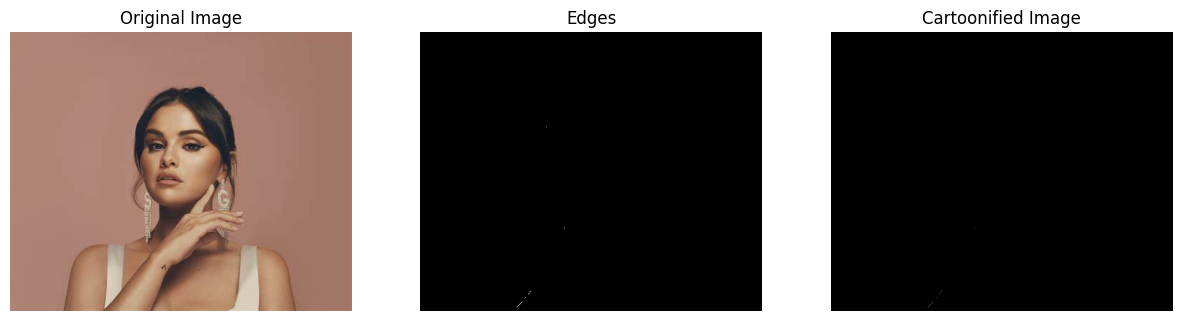

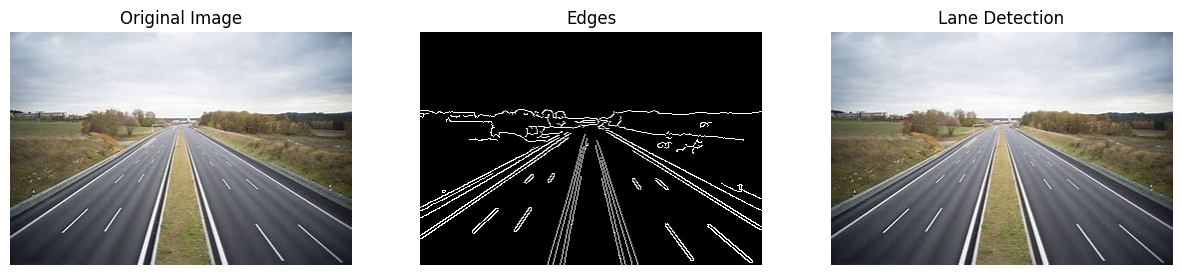

In [ ]:
# Run the functions
cartoon_result = cartoonify_image("Part1.jpg",median_ksize,laplacian_ksize,Threshold,bilateral_d,bilateral_sigmaColor,bilateral_sigmaSpace)
lane_result = detect_lanes("Part2.jpg",canny_threshold1,canny_threshold2,rho, theta, hough_threshold, minLineLength, maxLineGap)